# Sprint_03 機械学習スクラッチ　線形回帰

In [1]:
# Importing library
import numpy as np

In [77]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        self.coef_ = None
        
        # 損失を記録する空の配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        loss : numpy.float
            訓練用データから算出した損失関数
        val_loss : numpy.float
            検証用データから算出した損失関数
        """

        
        # バイアス項の有無を設定。False（バイアス有り）の場合、X_0 = 1をXにconcatする。
        if self.no_bias:
            self.coef_ = np.random.rand(len(X[0])) 
            # 特徴量は2種（2列:'GrLivArea', 'YearBuilt'）のため、ランダムの係数を2値を初期値として用意する。
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            # bias_val = np.ones(len(X_val)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
            # X_val = np.concatenate((bias_val, X_val), axis=1)
            self.coef_ = np.random.rand(len(X[0])) 

            if self.verbose:
                # print(f'bias:{bias}')
                print(f'bias.ndim:{bias.ndim}')
                print(f'bias.shape:{bias.shape}')
                print(f'X.shape:{X.shape}')
                print(f'X_val.shape:{X_val.shape}')

        
        # self.coef_ = np.random.rand(len(X[0])) # 特徴量は2種（2列:'GrLivArea', 'YearBuilt'）のため、ランダムの係数を2値を初期値として用意する。
        
        if self.verbose:
            print(f'初期係数:{self.coef_}')
            #print(f'X:{X}')
            #print(f'X.shape:{X.shape}')
            #print(f'len(X[0]):{len(X[0])}')
            #print(f'X_val:{X_val.shape}')
        
        # X_val, y_val両方とも有している場合
        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X) # i番目の訓練データX_trainから係数self.coef_を用いて仮定関数y_predを推測
            y_pred_val = self.predict(X_val) # i番目の検証用データX_valから係数self.coef_を用いて仮定関数y_pred_valを推測
            
            # y_pred_val = self._linear_hypothesis(X_val) 
            # バイアス項が無い場合は、この計算も可能であるが、
            # バイアス項が有る場合は、X_valとXの列数とが等しくないので、_linear_hypothesis内の係数とも計算ができない。

            self.coef_ = self._gradient_descent(X, y) # 勾配降下法で新しい係数を算出
            # 仮定関数y_predと正解値yの偏差とXの乗算を基に学習率を掛けた平均値で新しい係数を算出
            # print(f'新しい係数:{self.coef_}')

            self.loss[i] = self._cost_function(y_pred, y) # 新しい係数から算出したy_predと正解の値yとで損失関数を算出
            self.val_loss[i] = self._cost_function(y_pred_val, y_val)
            # print(f'self.loss:{self.loss}')
            # print(f'self.val_loss:{self.val_loss}')
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(f'loss.shape:{self.loss.shape}') # (100, ) # self.iter分の数字
            print(f'y_pred: {y_pred.shape}') # (1022, )
            print(f'y_pred_val: {y_pred_val.shape}') # (438, )
            print(f'self.coef_.shape: {self.coef_.shape}') # (2, )

    def _gradient_descent(self, X, y):
        """
        fitメソッドで呼び出された際に最急降下法による学習を行う。

        Parameters
        ----------
        self: class関数を引用する。

        X : 次の形のndarray, shape (n_samples, n_features)

        error : 

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果    


        """

        # h_thetaとyはnumpy.ndarrayであること
        # inside_sigma = np.multiply((h_theta - y_train), X_train)

        self.coef_ = self.coef_ - (self.lr/len(X)) * np.matmul((self._linear_hypothesis(X)-y), X)

        return self.coef_
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        theta : 次の形のndarray, shape (n_samples, )
         パラメータ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        Process
        -------    
          1. theta[0]はそのままにして、残りの行数分Xと配列数分y（ここではtheta）の積の和を求める。
          2. Xとthetaの行列の積はnp.matmulを使う。
          3. np.sumで積の総和を求める。

        """

        # solution = self.coef_[0] + np.sum(np.matmul(self.coef_[1: ], X))
        # solution = theta[0] + np.prod(theta[1: ], X)

        solution = np.dot(X, self.coef_.T)
        return solution
    
    def _cost_function(self, y_pred, y): # okay
        """
        目的関数（損失関数）

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        loss : numpy.float
          訓練用データと検証用データから算出した損失関数に用いられる。
        """

        loss = np.sum(np.square(np.subtract(y_pred, y))) / (2 * len(y))
        return loss
    
    def predict(self, X): # okay
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias:
            pass
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
        # h_theta = np.matmul(X, self.coef_.T) 
        return np.matmul(X, self.coef_.T) 
        

### Example

In [137]:
class ScratchLinearRegression_example():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter=100, lr=0.1, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.coef_ = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # bias無しの場合はX_0を追加せずパラメータを作成
        if self.no_bias:
            self.coef_ = np.random.rand(len(X[0]))
        # bias有りの場合はX_0 = 1をXにconcatし、パラメータを作成
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
            self.coef_ = np.random.rand(len(X[0]))
            print(f'bias:{bias}')
            print(f'bias.shape:{bias.shape}')
            print(f'X.shape:{X.shape}')
        print(f'初期係数:{self.coef_}')
        # 検証データに対する学習の有無はX_valとy_valが提示された場合のみに指定
        # hasattr関数を使用し、X_val, y_valが__array__attributeを所持するかで判断
        if hasattr(X_val, '__array__') and hasattr(y_val, '__array__'):
            for i in range(self.num_iter):
                
                h_x_array = self._linear_hypothesis(X)
                pred = self.predict(X_val)
                
                self.coef_ = self._gradient_descent(X, y, h_x_array)
                # print(f'新しい係数:{self.coef_}')
                self.loss[i] = self._cost_function(h_x_array, y)
                self.val_loss[i] = self._cost_function(pred, y_val)
        
        else:
            for i in range(self.num_iter):

                h_array = self._linear_hypothesis(X)
                
                self.coef_ = self._gradient_descent(X, y, h_x_array)

                self.loss[i] = self._cost_function(h_x_array, y)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(f'loss.shape:{self.loss.shape}') # (100, )
            print(f'y_pred: {h_x_array.shape}') # (1022, )
            print(f'y_pred_val: {pred.shape}') # (438, )
            print(f'self.coef_.shape: {self.coef_.shape}') # (2, )
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        
        theta : 次の形のndarray, shape (n_samples, )
        　パラメータ
        
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        
        """
        # solution = np.matmul(X, self.coef_.T)
        
        return np.matmul(X, self.coef_.T)

    def _gradient_descent(self, X, y, h_x_array):
        """
        fitメソッドで呼び出された際に最急降下法による学習を行う。

        Parameters
        ----------
        self: class関数を引用する。

        X : 次の形のndarray, shape (n_samples, n_features)

        error :

        """
        self.coef_ -= (self.lr/len(X)) * np.matmul((h_x_array - y), X)

        return self.coef_
      
    def _cost_function(self, pred, y):
        return np.sum((pred - y) ** 2) / (2 * len(y))

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        h_theta = np.matmul(X, self.coef_.T)

        return h_theta

## 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装せよ。

$\begin{align}
h_\theta(x) = \theta_0x_0 + \theta_1x_1+...+\theta_jx_j+...+\theta_nx_n (x_0=1)
\end{align}$

$\begin{align}(x_0=1)\end{align}$のため、実際の式はこうなる。

$\begin{align}
h_\theta(x) = \theta_0 + \theta_1x_1+...+\theta_jx_j+...+\theta_nx_n (x_0=1)
\end{align}$
### 【目的】

* 上記の重回帰式を仮定する関数を作成する。

### 【考察】

* $\begin{align}\theta\end{align}$ は直線の傾き（coefficients）を制御している。
* $\begin{align}x_0 = 1\end{align}$ のため、切片は1である。
* $\begin{align}\theta_0\end{align}$ はバイアス項となる。（よって$\begin{align}\theta_0 = 1\end{align}$）
* 行列 $\begin{align}\theta\end{align}$ と行列 $\begin{align}x_n\end{align}$ の内積（np.dot or np.matmul）を算出する関数を作成する。
* 内積を算出するため、引数xの行数分の配列数thetaをnp.randomを用いて算出する。

### 【工程順序】
1. np.random（0-10の範囲）を用いて、xの行数分の配列数thetaのarrayを構築
2. x_train（ここでは引数x）を用いて$\begin{align}h_\theta\end{align}$(x)を求める。


In [ ]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    theta : 次の形のndarray, shape (n_samples, )
     パラメータ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    Process
    -------    
      1. theta[0]はそのままにして、残りの行数分Xと配列数分y（ここではtheta）の積の和を求める。
      2. Xとthetaの行列の積はnp.matmulを使う。
      3. np.sumで積の総和を求める。

    """

    # solution = self.coef_[0] + np.sum(np.matmul(self.coef_[1: ], X))
    # solution = theta[0] + np.prod(theta[1: ], X)

    solution = np.dot(X, self.coef_.T)
    return solution

## 【問題2】最急降下法

最急降下法により学習させる実装を行なう。

以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにする。

$\begin{align}
\theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
\end{align}$

ベクトル形式で表すとこうなる。

$\begin{align}
\theta := \theta-\alpha\frac{1}{m}[(h_\theta(x^{(i)})-y^{(i)})x^{(i)}]
\end{align}$

偏差を求める式がこの部分

仮定した傾きから得た値yを実際のyとの差を求める部分である。

$\begin{align}
(h_\theta(x^{(i)})-y^{(i)})
\end{align}$

-----

$\begin{align}:=\end{align}$：左辺を右辺によって定義する。

$\begin{align}\theta_j\end{align}$：傾き 
```python 
_coef
```
$\begin{align}\alpha\end{align}$：学習率
```python 
self.lr
```
$\begin{align}i\end{align}$：サンプル（要素）のインデックス位置

$\begin{align}j\end{align}$：特徴量のインデックス位置

$\begin{align}m\end{align}$：サンプル（要素）の最大インデックス値（繰り返し回数の最大値）
```python 
len(X)
```
$h_\theta(x^{(i)})$：_linear_hypothesis

$\begin{align}y^{(i)}\end{align}$：y_train

$\begin{align}x_j^{(i)}\end{align}$：X_train

### 【目的】

* ひな形_gradient_descent（勾配降下）を用いて、最急降下法による機械学習が行えるように関数を完成させる。

### 【考察】

* 最急降下法とは、接線の傾き（$\theta$）をゼロに近づくようにxの値を更新していき最適解に収束させる方法。
* := の意味は「左辺を右辺で定義（代入）する」
* 偏微分：特定の文字以外を定数とみなして微分したものを偏微分（偏導関数）と言います。
    * 微分：ある関数の任意の点における傾き（$\theta$）を導く式「導関数」を求めること。
    * 傾き（$\theta$）を求めるには2点間の変化の割合を求めること。
        * $変化の割合=\frac{yの増加量}{xの増加量}$

最急降下法のアルゴリズム
1. 対象とする関数を$(h_\theta(x^{(i)})$とし、関数$(h_\theta(x^{(i)})$の引数となるのがベクトルX
2. $h_\theta(x^{(i)})-y^{(i)}$が偏差となる。


In [ ]:
def _gradient_descent(self, X, y):
    """
    fitメソッドで呼び出された際に最急降下法による学習を行う。

    Parameters
    ----------
    self: class関数を引用する。

    X : 次の形のndarray, shape (n_samples, n_features)

    error : 

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果    


    """

    # h_thetaとyはnumpy.ndarrayであること
    # inside_sigma = np.multiply((h_theta - y_train), X_train)

    self.coef_ -= (self.lr/len(X)) * np.matmul((self._linear_hypothesis(X)-y), X)

    return self.coef_

## 【問題3】推定

* 推定する仕組みを実装せよ。
* ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えること。
* 仮定関数 $h_\theta(x)$ (_linear_hypothesis)の出力が推定結果とする。

In [127]:
def predict(self, X): # okay
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    # h_theta = np.matmul(X, self.coef_.T) 

    return self._linear_hypothesis(X)

## 【問題4】平均二乗誤差

* 線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成せよ。
* 平均二乗誤差は以下の数式で表される。

$\begin{align}
L(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
\end{align}$

$m$ : 入力されるデータの数 
```python
len(y)
```
$h_\theta(x)$ : 仮定関数
```pythonn
y_pred
```
$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値
```python
y
```

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    mse = np.square(np.subtract(y_pred, y)).mean()
    
    return mse

## 【問題5】目的関数

* 以下の数式で表される線形回帰の**目的関数（損失関数）**を実装せよ。
* そして、これをself.loss, self.val_lossに記録すること。

$\begin{align}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2
\end{align}$

$m$ : 入力されるデータの数
```python
len(y)
```
$h_\theta(X)$ : 仮定関数
```python
y_pred
```
$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

In [ ]:
def _cost_function(self, y_pred, y): # okay
    """
    目的関数（損失関数）

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    loss : numpy.float
      訓練用データと検証用データから算出した損失関数に用いられる。
    """

    loss = np.sum(np.square(np.subtract(y_pred, y))) / (2 * len(y))
    return loss

## 【問題6】学習と推定

* House Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なうこと。
* scikit-learnによる実装と比べ、正しく動いているかを確認せよ。

In [26]:
# File system manangement
import os
import pandas as pd

house_df = pd.read_csv('../Data/house_prices_train.csv')

# 目的変数
y_house = np.array(house_df.loc[:, ['SalePrice']])
y_house = np.reshape(y_house,(-1))

# 説明変数 GrLivArea, YearBuiltのみを抽出
X_house = np.array(house_df.loc[:, ['GrLivArea', 'YearBuilt']])

print(X_house.shape)
print(y_house.shape)

(1460, 2)
(1460,)


In [5]:
# 自作のtrain_test_splitを構築
def scratch_train_test_split(X, y, train_size=0.7):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    
    Process
    ----------
    1. Randomizing
        1. Using np.random.shuffle(), shuffle the two arrays.
        2. Make pre_shuffle_x, pre_shuffle_y, post_shuffle_x, post_shuffle_y.

    2. Dividing (Default: test_size 0.25, train_size 0.75)
        1. Using this [tactics](https://stackoverflow.com/questions/58374049/split-a-list-with-a-adjustable-ratio) to split a list.
        2. Make 2 splitted lists for train and test from each X and y
    3. Return
        1. Return value.
    
    """
    
    # Intake parameter X, y and shuffle them.
    np.random.shuffle(X)
    np.random.shuffle(y)
    
    # Split X and y into given ratio using len() function.
    elements_x = len(X)
    
    # print(f"elements_x:{elements_x}") # Return number of items
    middle_x = int(elements_x * train_size) # The number of items is divided.
    X_train, X_test = X[:middle_x], X[middle_x:] # "middle_x" becomes the mid point to seperate.
    
    # print(f"x_train:{X_train}, x_test{X_test}") # Sanity check.

    elements_y = len(y) # Same logic as X.
    middle_y = int(elements_y * train_size)
    y_train, y_test = y[:middle_y], y[middle_y:]
    
    return X_train, X_test, y_train, y_test

In [18]:
# 自作のscratch_train_test_splitを実行

X_train, X_test, y_train, y_test = scratch_train_test_split(X_house, y_house)

y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

print(X_train)

print(y_train)

[[1844 2005]
 [ 902 1983]
 [1441 1999]
 ...
 [1442 1990]
 [1394 1963]
 [2554 1890]]
[256300 157000 142500 ... 239686 101000 325624]


In [27]:
# scikit-learnのtrain_test_splitを実行
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.3)

y_train = np.reshape(y_train,(-1))
y_test = np.reshape(y_test,(-1))

print(X_train)
print(y_train)

[[1578 1941]
 [1204 1998]
 [2058 1917]
 ...
 [1482 1992]
 [ 894 1968]
 [1535 1979]]
[133000 162000 129500 ... 163900 129000 118964]


In [28]:
# 線形回帰のため、標準化を行う
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test) # X_testは未知のデータなので、fitするとX_train_stdにX_testの要素が混入するため、X_testはfitさせない。

In [82]:
# Scikit-learnの線形回帰を実装
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sk_lr = LinearRegression()

sk_lr.fit(X_train_std, y_train)

sk_pred = sk_lr.predict(X_test_std)

sk_mse = mean_squared_error(y_test, sk_pred)

print(f'scikit-learnモデルのMSE：{sk_mse:.3g}')
print("バイアス =", sk_lr.intercept_)

scikit-learnモデルのMSE：1.97e+09
バイアス = 179752.78962818003


In [78]:
# 自作の線形回帰を実装
scratch_lr = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=True)

scratch_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scratch_pred = scratch_lr.predict(X_test_std)

scratch_mse = MSE(y_test, scratch_pred)

print(f'scratchモデルのMSE: {scratch_mse:.3g}')

bias.ndim:2
bias.shape:(1022, 1)
X.shape:(1022, 3)
X_val.shape:(438, 2)
初期係数:[0.48261738 0.22348827 0.60572104]
loss.shape:(100,)
y_pred: (1022,)
y_pred_val: (438,)
self.coef_.shape: (3,)
scratchモデルのMSE: 1.97e+09


In [139]:
# Example
sc_lr = ScratchLinearRegression_example(num_iter=100, lr=0.1, no_bias=True, verbose=True)

sc_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

sc_lr_pred = sc_lr.predict(X_test_std)

sc_mse = MSE(sc_lr_pred, y_test)

print(f'scratchモデルのMSE: {sc_mse:.3g}')

初期係数:[0.49150291 0.76841405]
loss.shape:(100,)
y_pred: (1022,)
y_pred_val: (438,)
self.coef_.shape: (2,)
scratchモデルのMSE: 3.56e+10


## 【問題7】学習曲線のプロット

* 学習曲線を表示する関数を作成し実行せよ。
* グラフを見て、損失が適切に下がっているかどうか確認せよ。
* 線形回帰クラスの雛形内のself.lossとself.val_lossに損失の記録がされているので、それらを入力値とせよ。

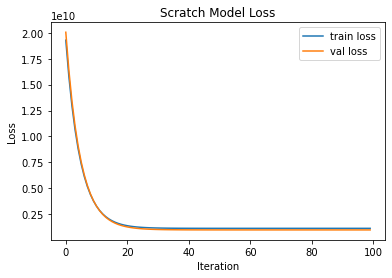

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.val_loss)), scratch_lr.val_loss, label='val loss')

plt.title("Scratch Model Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

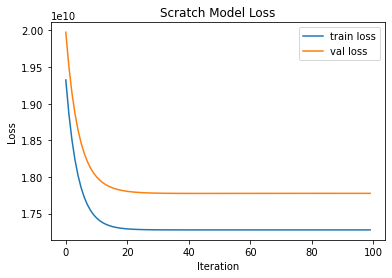

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure

plt.plot(np.arange(len(sc_lr.loss)), sc_lr.loss, label='train loss')
plt.plot(np.arange(len(sc_lr.val_loss)), sc_lr.val_loss, label='val loss')

plt.title("Scratch Model Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 【問題8】（アドバンス課題）バイアス項の除去

* バイアス項$\begin{align}\theta_0\end{align}$を抜くと学習がどう変化するか検証せよ。
* また、線形回帰モデルにおけるバイアス項の役割の考察・調査せよ。

1. 自作モデル、ScratchLinearRegression()にバイアス項のon/off機能を追加。
    * 現状、バイアス項が無いので、バイアス項を追加させる。
2. 結果を比較検証する。
3. バイアス項について、調べる。

In [90]:
# バイアス項が有る場合

scratch_lr = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=False, verbose=True)

scratch_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scratch_pred = scratch_lr.predict(X_test_std)

scratch_mse = MSE(y_test, scratch_pred)

print(f'scratchモデルのMSE: {scratch_mse:.3g}')

bias.ndim:2
bias.shape:(1022, 1)
X.shape:(1022, 3)
X_val.shape:(438, 2)
初期係数:[0.17754867 0.37296854 0.38996593]
loss.shape:(100,)
y_pred: (1022,)
y_pred_val: (438,)
self.coef_.shape: (3,)
scratchモデルのMSE: 1.97e+09


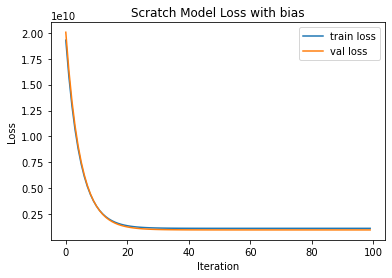

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.val_loss)), scratch_lr.val_loss, label='val loss')

plt.title("Scratch Model Loss with bias")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [87]:
# バイアス項が無い場合

scratch_lr = ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=True, verbose=True)

scratch_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scratch_pred = scratch_lr.predict(X_test_std)

scratch_mse = MSE(y_test, scratch_pred)

print(f'scratchモデルのMSE: {scratch_mse:.3g}')

初期係数:[0.81553032 0.04049246]
loss.shape:(100,)
y_pred: (1022,)
y_pred_val: (438,)
self.coef_.shape: (2,)
scratchモデルのMSE: 3.43e+10


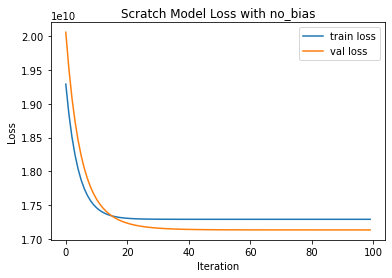

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.val_loss)), scratch_lr.val_loss, label='val loss')

plt.title("Scratch Model Loss with no_bias")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

### 【考察】

* バイアス項が有ることによって、平均二乗誤差がバイアス項有りと比較して大きく減少した。
* そもそもバイアスとは推定結果と実測値との差のため、差異が小さい程、予測精度が高くなるが、過学習に陥る可能性がある。
* バイアスが無い状態とは$\begin{align}\theta_0 = 0\end{align}$と同じ意味のため、正確にはバイアス項が無いとは言い難い。
    * ただし、バイアス項を追加する事は、データに対して列数を追加することになるため、コード内での微調整が必要とされる。
* 結果的にバイアス項の有無によって、MSEが変化する理由は不明

## 【問題9】（アドバンス課題）特徴量の多次元化

* 特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証せよ。